Testing out adiabatic evolution on $2 \times 2$ matrices

In [86]:
import numpy as np
import scipy.linalg
import scipy.sparse
import matplotlib.pyplot as plt
tol = 1e-5

In [2]:
H_A = np.array([[1, 0], [0, -1]])
# H_B = np.array([[0, 1], [1, 0]]) # If this is H_B, there isn't a crossing
H_B = np.array([[-5, 0], [0, 4]]) # If this is H_B, there is a crossing so ground state goes to excited state
H = lambda s: (1-s)*H_A + s*H_B
psi_A = np.array([0, 1])

In [3]:
np.dot(H_A, psi_A)

array([ 0, -1])

In [4]:
# Let's do 5 steps: H(0), H(0.25), H(0.5), H(0.75), H(1) at t=1 
n = 50
t = 1
res = psi_A
for i in range(n): 
    s = i / (n-1)
    res = np.dot(scipy.linalg.expm(-1j * H(s) * t), res)

In [5]:
res

array([0.        +0.j        , 0.92175127+0.38778164j])

In [6]:
np.dot(H_B, res)

array([0.        +0.j        , 3.68700508+1.55112654j])

In [7]:
# Plot lowest two eigenvalues for n steps of H(s)
x = np.arange(0, 1 + 1e-10, 1/(n-1))
y_ground = [] 
y_excited = [] 
for i in range(n): 
    s = i / (n-1)
    eig, _ = np.linalg.eigh(H(s)) # Should already be in ascending order 
    assert len(eig) == 2 
    y_ground.append(eig[0])
    y_excited.append(eig[1])

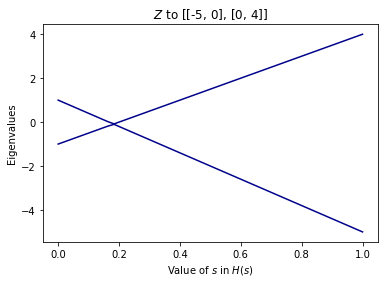

In [8]:
plt.plot(x, y_ground, color='darkblue')
plt.plot(x, y_excited, color='darkblue')
plt.title("$Z$ to [[-5, 0], [0, 4]]")
plt.xlabel('Value of $s$ in $H(s)$')
plt.ylabel('Eigenvalues')
plt.show()
# plt.savefig('adiabatic_crossing.png')

Adiabatic evolution for 2x1 Hubbard

In [9]:
from openfermion.utils import HubbardSquareLattice 

x_n = 2 
y_n = 1
n_dofs = 1
periodic = 0
spinless = 0 

lattice = HubbardSquareLattice(x_n, y_n, n_dofs=n_dofs, periodic=periodic, spinless=spinless)

from openfermion.hamiltonians import FermiHubbardModel
from openfermion.utils import SpinPairs
tunneling = [('neighbor', (0, 0), 1.)] 
interaction = [('onsite', (0, 0), 2., SpinPairs.DIFF)] 
potential = None
mag_field = 0. 
particle_hole_sym = False 

hubbard = FermiHubbardModel(lattice , tunneling_parameters=tunneling, interaction_parameters=interaction, 
                            potential_parameters=potential, magnetic_field=mag_field, 
                            particle_hole_symmetry=particle_hole_sym)
# 4 qubits so 2^4 = 16 dimensional state space

In [10]:
hubbard.tunneling_terms()

-1.0 [0^ 2] +
-1.0 [1^ 3] +
-1.0 [2^ 0] +
-1.0 [3^ 1]

In [11]:
from openfermion.transforms import get_sparse_operator 
from openfermion.utils import get_ground_state

H_A = get_sparse_operator(hubbard.tunneling_terms())
H_B = get_sparse_operator(hubbard.hamiltonian())
H = lambda s: (1-s)*H_A + s*H_B
psi_A = get_ground_state(H_A)[1] # We can use this because no degeneracy in 2x1 model

In [12]:
# Using final_wavefunction and prepare_gaussian_state 
from openfermion import get_quadratic_hamiltonian
from openfermioncirq import prepare_gaussian_state
from cirq import Circuit, final_wavefunction, LineQubit
psi_A = final_wavefunction(Circuit(prepare_gaussian_state(
    LineQubit.range(4), 
    get_quadratic_hamiltonian(hubbard.tunneling_terms()))))
psi_A

array([ 0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
        0.0000000e+00+0.0000000e+00j, -4.9999997e-01+1.2246467e-16j,
        0.0000000e+00+0.0000000e+00j, -3.0616168e-17+5.6240991e-33j,
        4.9999997e-01-6.1232336e-17j,  0.0000000e+00+0.0000000e+00j,
        0.0000000e+00+0.0000000e+00j, -4.9999997e-01+6.1232336e-17j,
        9.1848507e-17-5.6240995e-33j,  0.0000000e+00+0.0000000e+00j,
       -4.9999997e-01+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j,
        0.0000000e+00+0.0000000e+00j,  0.0000000e+00+0.0000000e+00j],
      dtype=complex64)

In [13]:
# Let's do 5 steps: H(0), H(0.25), H(0.5), H(0.75), H(1) at t=1 
n = 5
t = 1
res = psi_A
print(res)
for i in range(n): 
    s = i / (n-1)
#     res = np.dot(sp.expm(-1j * H(s) * t), res)
    e = scipy.linalg.expm(-1j * H(s) * t)
    res = e.dot(res)

[ 0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
  0.0000000e+00+0.0000000e+00j -4.9999997e-01+1.2246467e-16j
  0.0000000e+00+0.0000000e+00j -3.0616168e-17+5.6240991e-33j
  4.9999997e-01-6.1232336e-17j  0.0000000e+00+0.0000000e+00j
  0.0000000e+00+0.0000000e+00j -4.9999997e-01+6.1232336e-17j
  9.1848507e-17-5.6240995e-33j  0.0000000e+00+0.0000000e+00j
 -4.9999997e-01+0.0000000e+00j  0.0000000e+00+0.0000000e+00j
  0.0000000e+00+0.0000000e+00j  0.0000000e+00+0.0000000e+00j]


In [14]:
res

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  6.59063564e-02-3.53071442e-01j,
        0.00000000e+00+0.00000000e+00j, -3.06161680e-17+5.62409909e-33j,
       -3.58082448e-02+6.08041626e-01j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  3.58082448e-02-6.08041626e-01j,
        9.18485073e-17-5.62409946e-33j,  0.00000000e+00+0.00000000e+00j,
        6.59063564e-02-3.53071442e-01j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j])

In [15]:
from openfermion.utils import inner_product 

def overlap(a, b):
    """Calculates the overlap between vectors a and b. This metric is also known as fidelity. """
    inner = inner_product(a, b)
    return (np.conjugate(inner) * inner).real

In [16]:
overlap(res, get_ground_state(H_B)[1]) # With 5 steps, we get 0.99648 overlap. Increases if we increase steps. 

0.9964795950032181

Testing out adiabatic evolution for 2x2 Hubbard. This tunneling term has degnerate ground states so we have to be more specific which one we want to start with. 

In [17]:
y_n = 2
lattice = HubbardSquareLattice(x_n, y_n, n_dofs=n_dofs, periodic=periodic, spinless=spinless)
hubbard = FermiHubbardModel(lattice , tunneling_parameters=tunneling, interaction_parameters=interaction, 
                            potential_parameters=potential, magnetic_field=mag_field, 
                            particle_hole_symmetry=particle_hole_sym)

In [53]:
from openfermion.transforms import get_sparse_operator

# Lowest eigenvalue/vector of Hubbard Hamiltonian
# The column v_hub[:, i] is the eigenvector corresponding to the eigenvalue w_hub[i]
hub_sparse = get_sparse_operator(hubbard.hamiltonian())
w_hub, v_hub = scipy.sparse.linalg.eigsh(hub_sparse, k=1, which='SA') 

# From looking at the spectrum,  I noticed the ground state was degenerate. 
# There were 16 eigenvectors with the lowest eigenvalue. 
# Actually, the initial state might not even be a ground state. Let's try 
# as many of the eigenvectors as we can. 
tun_sparse = get_sparse_operator(hubbard.tunneling_terms())
# k can be at most n-2 where n is the dimension of the matrix
w_tun, v_tun = scipy.sparse.linalg.eigsh(tun_sparse, k=np.shape(tun_sparse)[0]-2, which='SA')

# Do a perturbation and find state with most overlap 
s = 1e-4
int_sparse = get_sparse_operator(hubbard.interaction_terms())
perturbed_sparse = tun_sparse + s * int_sparse

w_per,v_per = scipy.sparse.linalg.eigsh(perturbed_sparse, k=5, which='SA') 

for i in range(len(w_per)):
    fid = overlap(v_hub[:, 0], v_per[:, i])
    print('Perturbed eigenvector v_per[:, {}] has overlap {}.'.format(i, fid))
    
# WOW, there's a clear winner here v_per[:, 0]
per_state_most_overlap = v_per[:, 0]

max_overlap = 0
index_max_overlap = 0

for i in range(len(w_tun)):
    fid = overlap(per_state_most_overlap, v_tun[:, i])
    if fid > max_overlap: 
        print(fid, i)
        max_overlap = fid 
        index_max_overlap = i 
print("Tunneling eigenvector v_tun[:, {}] had the maximum overlap of {} with the best perturbed state.".format(
    index_max_overlap, max_overlap))
initial_state = v_tun[:, index_max_overlap]

Perturbed eigenvector v_per[:, 0] has overlap 0.9770315592603948.
Perturbed eigenvector v_per[:, 1] has overlap 5.3962971185307616e-20.
Perturbed eigenvector v_per[:, 2] has overlap 6.0845511831931035e-22.
Perturbed eigenvector v_per[:, 3] has overlap 3.8803890760857255e-24.
Perturbed eigenvector v_per[:, 4] has overlap 1.768596525210091e-24.
0.032101960327299166 0
0.05684090919459847 24
0.10190876106600559 27
0.10423678708710912 28
0.1840036269884679 30
0.25756512903221257 32
Tunneling eigenvector v_tun[:, 32] had the maximum overlap of 0.25756512903221257 with the best perturbed state.


In [66]:
H_A = get_sparse_operator(hubbard.tunneling_terms())
H_B = get_sparse_operator(hubbard.hamiltonian())
H = lambda s: (1-s)*H_A + s*H_B
psi_A = initial_state

In [78]:
v_tun.shape[1]

254

In [84]:
# Let's do 5 steps: H(0), H(0.25), H(0.5), H(0.75), H(1) at t=1 
n = 5
t = 3
for state in range(v_tun.shape[1]):
#     res = psi_A
    res = v_tun[:, state]
    for i in range(n): 
        s = i / (n-1)
    #     res = np.dot(sp.expm(-1j * H(s) * t), res)
        e = scipy.linalg.expm(-1j * H(s) * t)
        res = e.dot(res)
    x = overlap(res, v_hub[:, 0])
    if x > 0.2: 
        print(x, state)

0.2528572942031033 32


I noticed that every time we run the cell that determines the tunneling eigenvectors, we get different overlaps. I should have noticed this earlier! Since we have a degenerate ground state for the tunneling term, the eigenvectors span some subspace, so we can pick any basis of that subspace as the eigenvectors. This means that letting the algorithm pick gives us a random one. 

Once we do that, we should try to find a *linear combination* in that ground state subspace that's closest to the true ground state eigenvector of the Hubbard Hamiltonian. We can use Least-Squares to do this!

In [112]:
# Find the ground state subspace 
min_eig = -4 
indices_ground = []
for i in range(len(w_tun)):
    if w_tun[i] - min_eig < tol: 
        indices_ground.append(i)
print(len(indices_ground))
ground_state_array = []
for i in indices_ground:
    ground_state_array.append(v_tun[:, i])
ground_state_array = np.array(ground_state_array)
ground_state_array.shape

# Check it's multiplied by -4
# print(inner_product(tun_sparse.dot(ground_state_subspace[0]),  ground_state_subspace[0]))

16


(16, 256)

In [115]:
projection = np.linalg.inv(ground_state_array @ (ground_state_array.T)).dot(ground_state_array).dot(v_hub[:,0])

In [117]:
overlap(projection, v_hub[:,0])

ValueError: shapes (16,) and (256,) not aligned: 16 (dim 0) != 256 (dim 0)

In [111]:
ground_state_subspace = []
for array in ground_state_array:
    vec = array.reshape((-1, 1))
    ground_state_subspace.append(vec)
    
ground_state_subspace = np.array(ground_state_subspace)
# print(len(ground_state_subspace), len(ground_state_subspace[0]))
ground_state_subspace.shape

(16, 256, 1)

In [126]:
min_eig = -4 
indices_ground = []
for i in range(len(w_tun)):
    if w_tun[i] - min_eig < tol: 
        indices_ground.append(i)
print(len(indices_ground), 'should be 16 for 2x2')
ground_state_array = []
for i in indices_ground:
    ground_state_array.append(v_tun[:, i])
    
mat = np.hstack(row.reshape((-1, 1)) for row in ground_state_array)
mat.shape

16 should be 16 for 2x2


/home/warren/github/qc-mentorship/env/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


(256, 16)

In [139]:
(mat @ ((mat.T @ mat) @ mat.T)).shape

(256, 256)

In [140]:
projection = mat @ (np.linalg.inv(mat.T @ mat) @ mat.T @ v_hub[:,0])
projection.shape

(256,)

In [143]:
overlap(projection, v_hub[:, 0]) 
# THERE WE GO

0.9545796915314158

In [164]:
psi_A = projection

# Let's do 5 steps: H(0), H(0.25), H(0.5), H(0.75), H(1) at t=1 
n = 5
t = 5
res = psi_A
for i in range(n): 
    s = i / (n-1)
#     res = np.dot(sp.expm(-1j * H(s) * t), res)
    e = scipy.linalg.expm(-1j * H(s) * t)
    res = e.dot(res)

In [165]:
overlap(res, v_hub[:, 0]) 
# We get stuck at some value - sometimes its .25 or .50 but increasing iterations doesn't improve

0.9750712881919028

In [48]:
overlap(res, psi_A)

0.3452137437742346